In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulateAR_p(nPath, nPeriod, initmu, initsigma, mu, sigma, phi):
    # nPath:      表示 nuber of observations
    # nPeriod:    表示遞延多少期
    # initmu:     表示起始值所來自母體分配的母體均數
    # initsigma:  表示起始值所來自母體分配的母體標準差
    # mu:          error term 所來自母體分配之均數
    # sigma:       error term 所來自母體分配之標準差
    # phi:         Need to be a List
    y_0 = np.random.normal(initmu, initsigma, size=(nPeriod,1))
    sims = np.zeros((nPath, 2))
    e = np.random.normal(mu,sigma,size=(nPath,1))
    phiM = np.array(phi)
    # r,c = phiM.shape
    # phi_m = np.array([phi[0], phi[1], phi_2, phi_1])  
    sims[:,0] = e[:,0]
    sims[0:nPeriod,1] = y_0[0:nPeriod,0] 
    for t in range(nPeriod,nPath):
        sims[t,1] = phiM[0] + np.sum(np.flip(phiM[1:],0) * sims[t-nPeriod:t,1] ) + sims[t,0]
        #sims[t,1] = phi_0 + phi_1 * sims[t-1,1] + phi_2 * sims[t-2,1] + phi_3 * sims[t-3,1]+sims[t,0]
    
    return sims

# AR(3)

In [7]:
np.random.seed(123)
phiM = [10,-0.2,0.1,-0.1]
simsP = simulateAR_p(nPath=15, nPeriod=3, initmu=5, initsigma=1, mu=0, sigma=1, phi = phiM)

In [8]:
simsP

array([[-1.50629471,  3.9143694 ],
       [-0.57860025,  5.99734545],
       [ 1.65143654,  5.2829785 ],
       [-2.42667924,  6.72502266],
       [-0.42891263,  8.15464614],
       [ 1.26593626,  9.77921145],
       [-0.8667404 ,  7.32037966],
       [-0.67888615,  8.01949445],
       [-0.09470897,  8.05550896],
       [ 1.49138963,  9.95019931],
       [-0.638902  ,  7.37465959],
       [-0.44398196,  8.27055516],
       [-0.43435128,  7.65398372],
       [ 2.20593008, 10.76472289],
       [ 2.18678609,  9.97218437]])

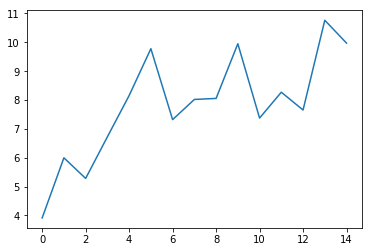

In [5]:
plt.plot(np.arange(15),simsP[:,1])

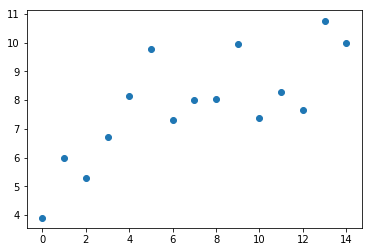

In [6]:
plt.scatter(np.arange(15),simsP[:,1])

# AR(1)

In [14]:
np.random.seed(123)
phiM = [10,-0.2]
simsP = simulateAR_p(nPath=950, nPeriod=1, initmu=5, initsigma=1, mu=0, sigma=1, phi = phiM)

In [15]:
simsP

array([[ 0.99734545,  3.9143694 ],
       [ 0.2829785 ,  9.50010462],
       [-1.50629471,  6.59368436],
       ...,
       [ 0.10146689,  8.16339081],
       [-0.4216841 ,  7.94563774],
       [-0.6929228 ,  7.71794966]])

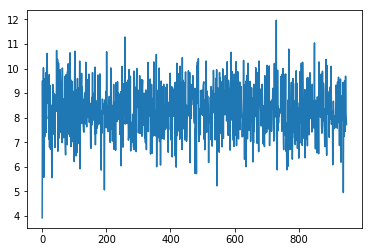

In [16]:
plt.plot(np.arange(950),simsP[:,1])

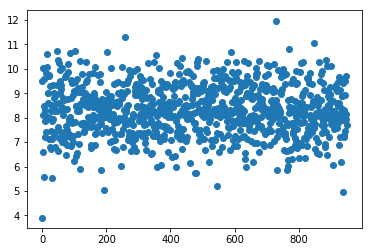

In [17]:
plt.scatter(np.arange(950),simsP[:,1])